Final Project Computer Vision
Autumn 2024



#Install Dependencies

_(Remember to choose GPU in Runtime if not already selected. Runtime --> Change Runtime Type --> Hardware accelerator --> GPU)_

In [2]:
# Pothole Detection with YOLOv5
# Install dependencies (uncomment if running for the first time)
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt



Cloning into 'yolov5'...
remote: Enumerating objects: 17067, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 17067 (delta 22), reused 27 (delta 12), pack-reused 17022 (from 1)
Receiving objects: 100% (17067/17067), 15.68 MiB | 17.61 MiB/s, done.
Resolving deltas: 100% (11712/11712), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.3/896.3 kB 23.2 MB/s eta 0:00:00


In [3]:
import os
import zipfile
import requests
from pathlib import Path
from IPython.display import Image, display
import torch

# Step 1: Download and Extract Dataset
dataset_url = "https://public.roboflow.com/ds/u2KutyWBLJ?key=lKXLvYqEjz"  # Replace with your dataset link
dataset_zip = "pothole_dataset.zip"

# Download dataset
if not os.path.exists(dataset_zip):
    print("Downloading dataset...")
    response = requests.get(dataset_url)
    with open(dataset_zip, "wb") as f:
        f.write(response.content)
    print("Download complete.")

# Extract dataset
dataset_dir = "pothole_dataset"
if not os.path.exists(dataset_dir):
    print("Extracting dataset...")
    with zipfile.ZipFile(dataset_zip, 'r') as zip_ref:
        zip_ref.extractall(dataset_dir)
    print("Extraction complete.")

# Step 2: Verify GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Download complete.
Extracting dataset...
Extraction complete.
Using device: cuda


In [4]:
# Step 3: Prepare YOLOv5 Training Configuration
# Update dataset YAML path for YOLOv5
data_yaml = Path(dataset_dir) / "data.yaml"
assert data_yaml.exists(), f"{data_yaml} not found. Ensure the dataset includes the data.yaml file."


In [7]:
# Step 4: Train the YOLOv5 Model
!python train.py \
  --img 640 \
  --batch 16 \
  --epochs 50 \
  --data pothole_dataset/data.yaml \
  --weights yolov5s.pt \
  --device 0



wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2024-11-26 19:17:02.064989: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-26 19:17:02.087902: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-26 19:17:02.094560: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: rriveromejia32 (rriveromejia32-udlap). Use `wandb login --relo

In [9]:
# Step 5: Evaluate and Test
# Test on sample images
# Monte Google Drive
#from google.colab import drive

#drive.mount('/content/drive')

test_image = "/content/baches-cdmx.jpeg"  # Replace with a test image path /A7_2.JPG
!python detect.py --weights runs/train/exp3/weights/best.pt --img 640 --conf 0.4 --source {test_image}



detect: weights=['runs/train/exp3/weights/best.pt'], source=/content/baches-cdmx.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-388-g882c35fc Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/baches-cdmx.jpeg: 416x640 4 potholes, 34.9ms
Speed: 0.5ms pre-process, 34.9ms inference, 682.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


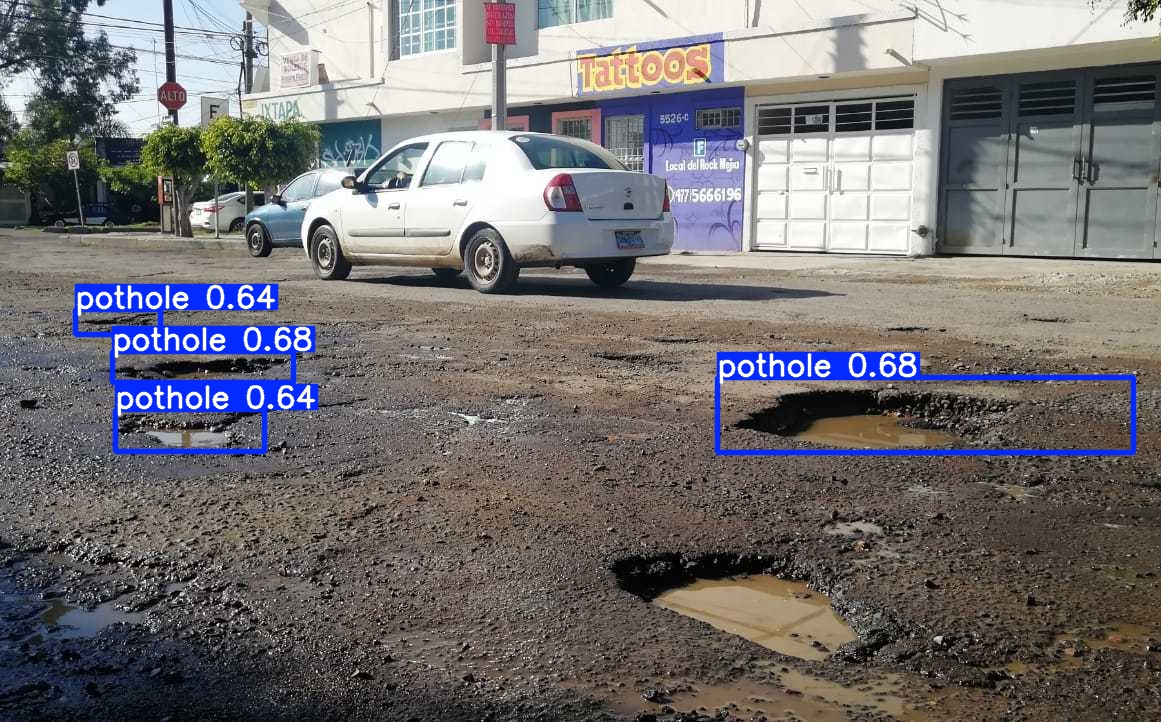

In [10]:
# Display the result
output_image = Path("runs/detect/exp2") / Path(test_image).name
if output_image.exists():
    display(Image(filename=output_image))
else:
    print("Test image not found. Make sure to update the test image path.")



In [12]:
# Step 6: Export the Model
# Export the trained model
!python export.py --weights runs/train/exp3/weights/best.pt --include onnx torchscript

export: data=data/coco128.yaml, weights=['runs/train/exp3/weights/best.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, per_tensor=False, dynamic=False, cache=, simplify=False, mlmodel=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['onnx', 'torchscript']
YOLOv5 🚀 v7.0-388-g882c35fc Python-3.10.12 torch-2.5.1+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs

PyTorch: starting from runs/train/exp3/weights/best.pt with output shape (1, 25200, 6) (13.7 MB)

TorchScript: starting export with torch 2.5.1+cu121...
TorchScript: export success ✅ 2.4s, saved as runs/train/exp3/weights/best.torchscript (27.2 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 270.9 MB/s eta 0:

In [13]:
# Rafael Eduardo Rivero Mejía 168866